Missing values in features: 0
Missing values in target: 0
R² score: 0.082
Mean Absolute Error: 46.39 crashes
   Actual  Predicted
0     134  71.172281
1      54  56.736525
2      77  62.472326
3      29  55.063933
4      24  51.663346
5     115  68.104687
6      12  47.831752
7      42  55.107598
8      25  52.317009
9      53  61.121048


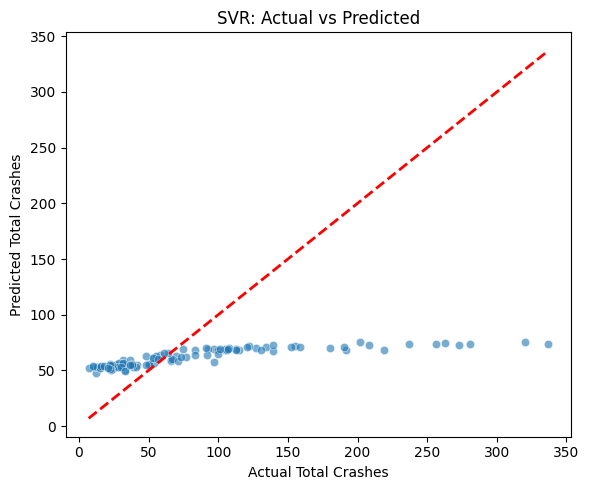

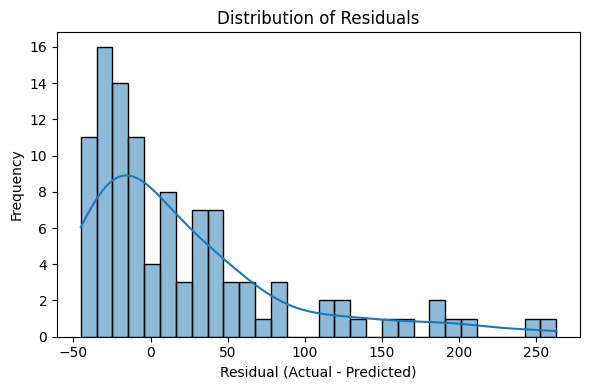

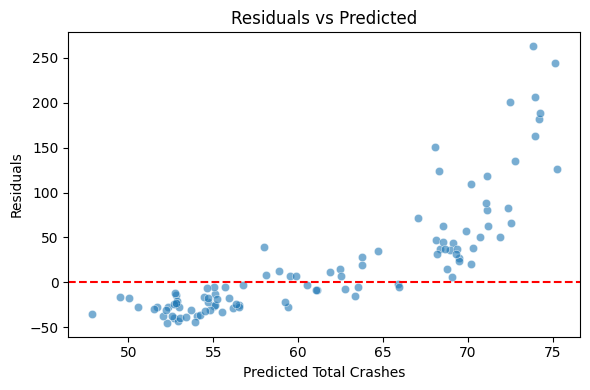

Train Score: 0.070
Test Score: 0.082


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load data
df = pd.read_csv('Nigeria Crash Data P.csv')

# 2. Prepare features and target
# Identify one-hot encoded state columns (they start with 'State_' and are boolean)
state_cols = [col for col in df.columns if col.startswith('State_') and col != 'State_Encoded']
# Exclude the 'Region_' columns to avoid redundancy (states already capture location)

feature_cols = [
    'Year',
    'Quarter_Sin',
    'Quarter_Cos',
    'SPV',
    'DAD',
    'PWR',
    'FTQ',
    'Other_Factors',
    'Total_Vehicles_Involved'
] + state_cols

X = df[feature_cols].copy()
y = df['Total_Crashes'].copy()

# Check for any missing values
print("Missing values in features:", X.isnull().sum().sum())
print("Missing values in target:", y.isnull().sum())

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scale features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train SVR model (RBF kernel)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# 6. Predict and evaluate
y_pred = svr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f} crashes")

# Optional: show a few predictions vs actual
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(comparison.head(10))




import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Actual vs Predicted scatter ---
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Crashes')
plt.ylabel('Predicted Total Crashes')
plt.title('SVR: Actual vs Predicted')
plt.tight_layout()
plt.show()

# --- 2. Residuals histogram ---
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

# --- 3. Residuals vs Predicted ---
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Total Crashes')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()
Train_Score = svr.score(X_train_scaled, y_train)
Test_Score = svr.score(X_test_scaled, y_test)
print(f"Train Score: {Train_Score:.3f}")
print(f"Test Score: {Test_Score:.3f}")